Found 534 images belonging to 3 classes.
Found 51 images belonging to 3 classes.
Found 26 images belonging to 3 classes.
Class Indices: {'aneurysm': 0, 'cancer': 1, 'tumor': 2}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 203s 8s/step - accuracy: 0.3121 - loss: 2.0155 - val_accuracy: 0.6250 - val_loss: 0.9989
Epoch 2/20
 1/16 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.5312 - loss: 1.0214

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.5312 - loss: 1.0214 - val_accuracy: 0.5789 - val_loss: 0.9741
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 127s 4s/step - accuracy: 0.5689 - loss: 0.9596
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.5625 - loss: 0.8532 - val_accuracy: 0.7188 - val_loss: 0.6123
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.6491 - loss: 0.7960 - val_accuracy: 0.8947 - val_loss: 0.5341
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8125 - loss: 0.7047 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.7682 - loss: 0.6226 - val_accuracy: 0.9375 - val_loss: 0.2731
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8636 - loss: 0.8465 - val_accuracy: 1.0000 - val_loss: 0.1444
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.8471 - loss: 0.4457
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.8125 - loss: 0.6641 - val_accuracy: 0.9688 - val_loss: 0.

Test Accuracy: 100.00%


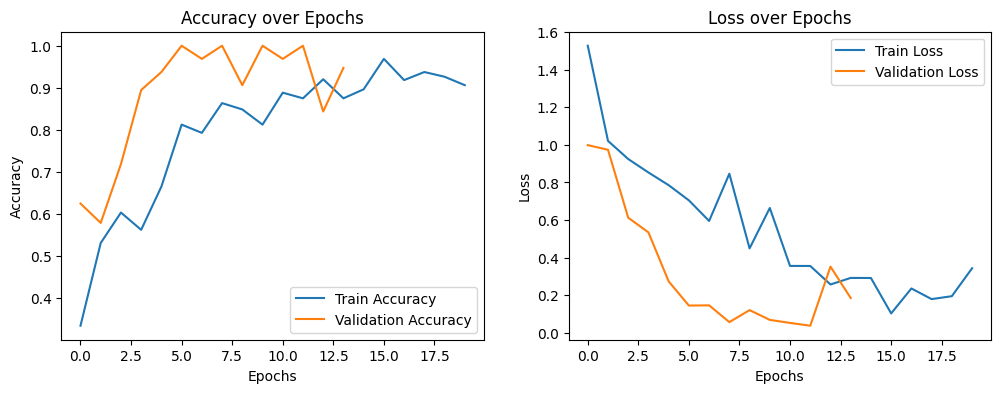

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Set directories
train_dir = '/content/drive/MyDrive/Tumor-Cancer-Aneurysm Detection.v2i.folder/train'
val_dir = '/content/drive/MyDrive/Tumor-Cancer-Aneurysm Detection.v2i.folder/valid'
test_dir = '/content/drive/MyDrive/Tumor-Cancer-Aneurysm Detection.v2i.folder/test'

# Parameters
img_height = 224
img_width = 224
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,       # Normalize pixel values
    rotation_range=20,       # Random rotation
    width_shift_range=0.2,   # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True     # Random horizontal flip
)

# No augmentation for validation and test sets
val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # For multi-class classification
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Verify class labels
print("Class Indices:", train_data.class_indices)

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 classes: aneurysm, cancer, tumor
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,  # Adjust as needed
    steps_per_epoch=train_data.samples // batch_size,
    validation_steps=val_data.samples // batch_size
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save the model
model.save('brain_disease_classification_model.h5')

# Plot training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import matplotlib.pyplot as plt

# Set directories
train_dir = 'path_to_dataset/train'
val_dir = 'path_to_dataset/val'
test_dir = 'path_to_dataset/test'

# Parameters
img_height = 224
img_width = 224

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,  # Will be tuned
    class_mode='categorical'
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=32,  # Will be tuned
    class_mode='categorical'
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)

# Verify class labels
print("Class Indices:", train_data.class_indices)


# Hyperparameter Tuning Function
def build_model(hp):
    model = models.Sequential()

    # Tune the number of filters in the first layer
    model.add(layers.Conv2D(
        filters=hp.Int('filters_1', min_value=16, max_value=64, step=16),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(img_height, img_width, 3)
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(
        filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third Convolutional Layer
    model.add(layers.Conv2D(
        filters=hp.Int('filters_3', min_value=64, max_value=256, step=64),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten Layer
    model.add(layers.Flatten())

    # Fully Connected Layer with Dropout
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))

    # Output Layer
    model.add(layers.Dense(3, activation='softmax'))  # 3 classes: aneurysm, cancer, tumor

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


# Hyperparameter Tuning with KerasTuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,  # Train for fewer epochs initially
    factor=3,
    directory='my_tuning_dir',
    project_name='aneurysm_cancer_tumor_classification'
)

# Early stopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Search for the best hyperparameters
tuner.search(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[stop_early]
)

# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best Hyperparameters:
- Filters (1st Conv Layer): {best_hps.get('filters_1')}
- Filters (2nd Conv Layer): {best_hps.get('filters_2')}
- Filters (3rd Conv Layer): {best_hps.get('filters_3')}
- Dense Units: {best_hps.get('dense_units')}
- Dropout Rate: {best_hps.get('dropout')}
- Learning Rate: {best_hps.get('learning_rate')}
""")

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=val_data.samples // val_data.batch_size
)

# Evaluate the model
test_loss, test_acc = best_model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save the best model
best_model.save('best_aneurysm_cancer_tumor_model.h5')

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
